In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model
from keras import backend as K

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

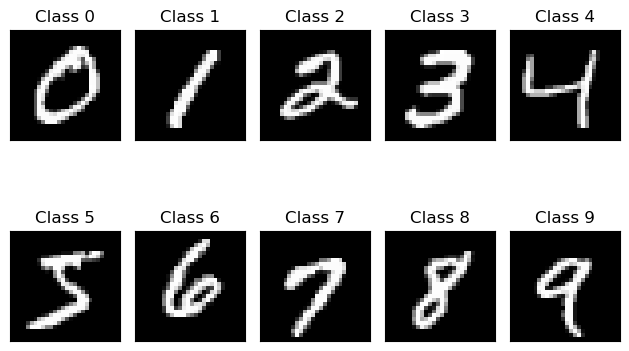

In [3]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [4]:
print('X_train.shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)

# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [5]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))


In [6]:
# prints a summary representation of your model
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [7]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

/Users/aserbina/anaconda3/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [8]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [9]:
#Compile discriminator
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [10]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [11]:
# prints a summary representation of your model
d_g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 784)               583312    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848913 (3.24 MB)
Trainable params: 581520 (2.22 MB)
Non-trainable params: 267393 (1.02 MB)
_________________________________________________________________


epoch = 1/100, d_loss=0.531, g_loss=1.633                                                                                                                      
1/1 [==============================] - 0s 37ms/step


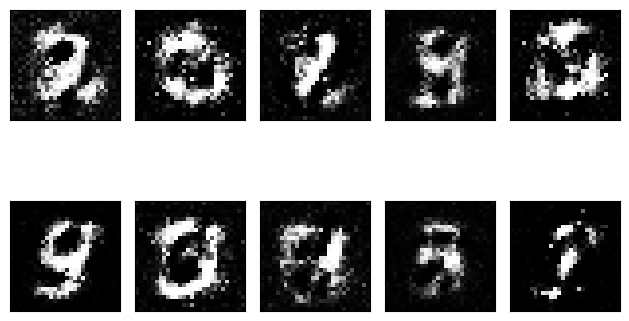

epoch = 2/100, d_loss=0.604, g_loss=1.244                                                                                                                      
epoch = 3/100, d_loss=0.575, g_loss=1.221                                                                                                                      
epoch = 4/100, d_loss=0.622, g_loss=1.087                                                                                                                      
epoch = 5/100, d_loss=0.638, g_loss=1.152                                                                                                                      
epoch = 6/100, d_loss=0.566, g_loss=1.225                                                                                                                      
epoch = 7/100, d_loss=0.587, g_loss=1.334                                                                                                                      
epoch = 8/100, d_loss=0.568, g_loss=1.19

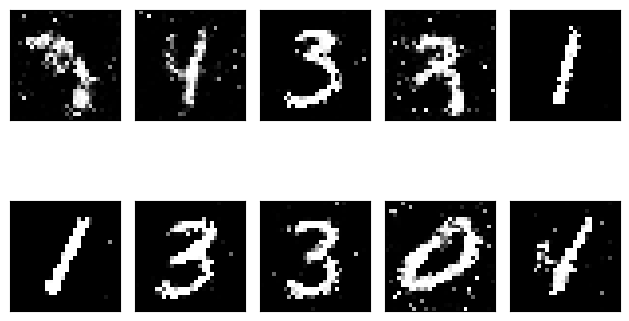

epoch = 12/100, d_loss=0.559, g_loss=1.335                                                                                                                      
epoch = 13/100, d_loss=0.503, g_loss=1.380                                                                                                                      
epoch = 14/100, d_loss=0.537, g_loss=1.438                                                                                                                      
epoch = 15/100, d_loss=0.506, g_loss=1.604                                                                                                                      
epoch = 16/100, d_loss=0.451, g_loss=1.541                                                                                                                      
epoch = 17/100, d_loss=0.562, g_loss=1.405                                                                                                                      
epoch = 18/100, d_loss=0.466, g_lo

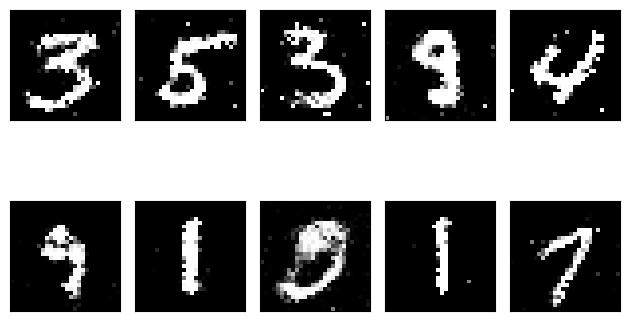

epoch = 22/100, d_loss=0.449, g_loss=1.654                                                                                                                      
epoch = 23/100, d_loss=0.553, g_loss=1.568                                                                                                                      
epoch = 24/100, d_loss=0.559, g_loss=1.557                                                                                                                      
epoch = 25/100, d_loss=0.600, g_loss=1.540                                                                                                                      
epoch = 26/100, d_loss=0.528, g_loss=1.751                                                                                                                      
epoch = 27/100, d_loss=0.513, g_loss=1.579                                                                                                                      
epoch = 28/100, d_loss=0.553, g_lo

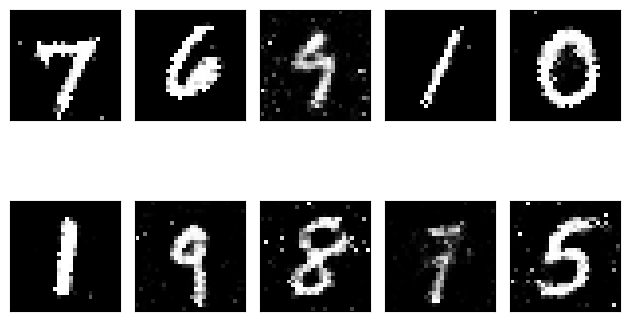

epoch = 32/100, d_loss=0.443, g_loss=1.664                                                                                                                                                                                                                           
epoch = 33/100, d_loss=0.543, g_loss=1.676                                                                                                                      
epoch = 34/100, d_loss=0.532, g_loss=1.670                                                                                                                                                                                                                           
epoch = 35/100, d_loss=0.537, g_loss=1.639                                                                                                                      
epoch = 36/100, d_loss=0.585, g_loss=1.538                                                                                                                

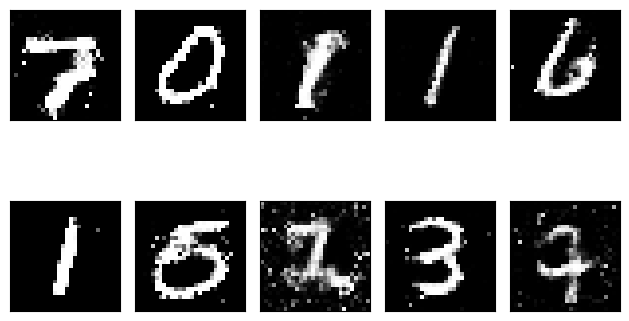

epoch = 42/100, d_loss=0.548, g_loss=1.528                                                                                                                      
epoch = 43/100, d_loss=0.482, g_loss=1.635                                                                                                                      
epoch = 44/100, d_loss=0.506, g_loss=1.481                                                                                                                      
epoch = 45/100, d_loss=0.642, g_loss=1.354                                                                                                                      
epoch = 46/100, d_loss=0.495, g_loss=1.398                                                                                                                      
epoch = 47/100, d_loss=0.671, g_loss=1.371                                                                                                                      
epoch = 48/100, d_loss=0.524, g_lo

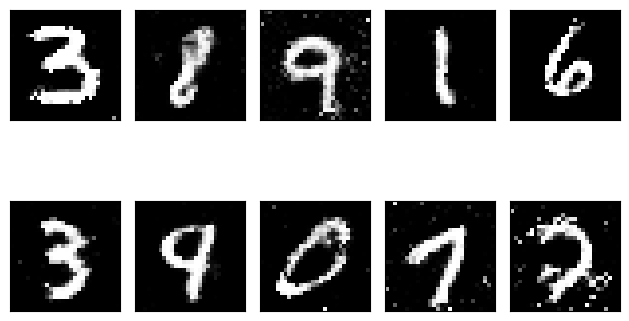

epoch = 52/100, d_loss=0.535, g_loss=1.412                                                                                                                      
epoch = 53/100, d_loss=0.552, g_loss=1.604                                                                                                                      
epoch = 54/100, d_loss=0.541, g_loss=1.471                                                                                                                      
epoch = 55/100, d_loss=0.499, g_loss=1.570                                                                                                                      
epoch = 56/100, d_loss=0.487, g_loss=1.630                                                                                                                      
epoch = 57/100, d_loss=0.539, g_loss=1.425                                                                                                                      
epoch = 58/100, d_loss=0.573, g_lo

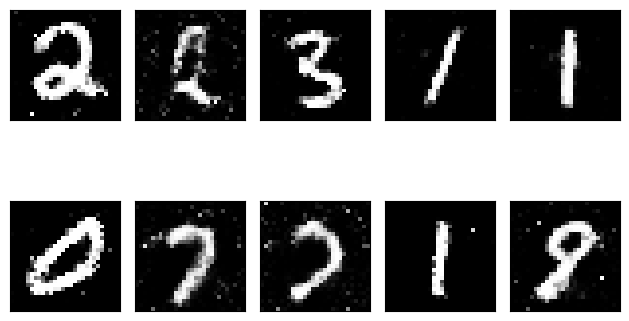

epoch = 62/100, d_loss=0.566, g_loss=1.556                                                                                                                      
epoch = 63/100, d_loss=0.461, g_loss=1.520                                                                                                                      
epoch = 64/100, d_loss=0.520, g_loss=1.761                                                                                                                      
epoch = 65/100, d_loss=0.625, g_loss=1.589                                                                                                                      
epoch = 66/100, d_loss=0.566, g_loss=1.526                                                                                                                      
epoch = 67/100, d_loss=0.527, g_loss=1.745                                                                                                                      
epoch = 68/100, d_loss=0.567, g_lo

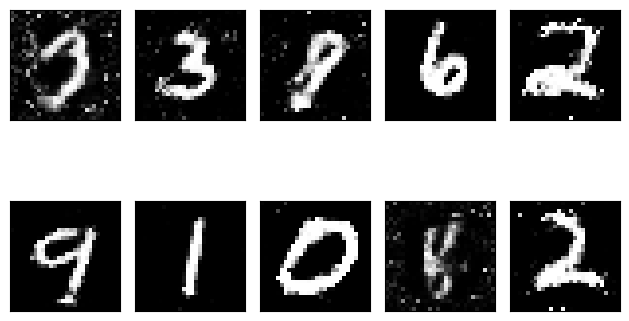

epoch = 72/100, d_loss=0.567, g_loss=1.600                                                                                                                      
epoch = 73/100, d_loss=0.527, g_loss=1.756                                                                                                                      
epoch = 74/100, d_loss=0.609, g_loss=1.446                                                                                                                      
epoch = 75/100, d_loss=0.573, g_loss=1.542                                                                                                                      
epoch = 76/100, d_loss=0.537, g_loss=1.734                                                                                                                      
epoch = 77/100, d_loss=0.546, g_loss=1.604                                                                                                                      
epoch = 78/100, d_loss=0.518, g_lo

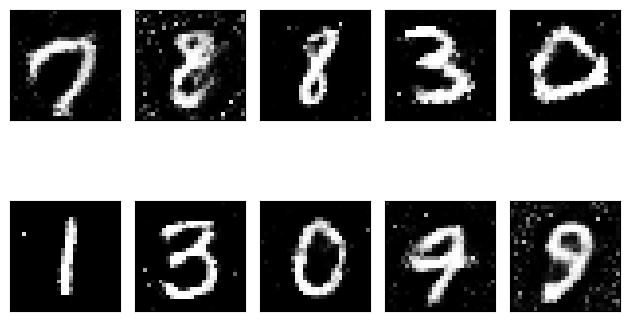

epoch = 82/100, d_loss=0.536, g_loss=1.741                                                                                                                      
epoch = 83/100, d_loss=0.534, g_loss=1.632                                                                                                                      
epoch = 84/100, d_loss=0.504, g_loss=1.619                                                                                                                      
epoch = 85/100, d_loss=0.567, g_loss=1.567                                                                                                                      
epoch = 86/100, d_loss=0.542, g_loss=1.571                                                                                                                      
epoch = 87/100, d_loss=0.533, g_loss=1.799                                                                                                                      
epoch = 88/100, d_loss=0.463, g_lo

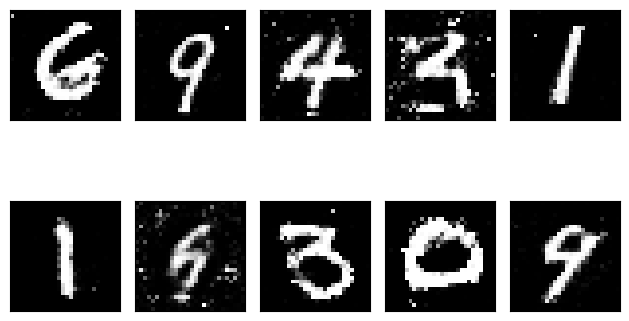

epoch = 92/100, d_loss=0.492, g_loss=1.867                                                                                                                      
epoch = 93/100, d_loss=0.491, g_loss=1.792                                                                                                                      
epoch = 94/100, d_loss=0.556, g_loss=1.658                                                                                                                      
epoch = 95/100, d_loss=0.536, g_loss=1.688                                                                                                                      
epoch = 96/100, d_loss=0.509, g_loss=1.821                                                                                                                      
epoch = 97/100, d_loss=0.494, g_loss=1.712                                                                                                                      
epoch = 98/100, d_loss=0.522, g_lo

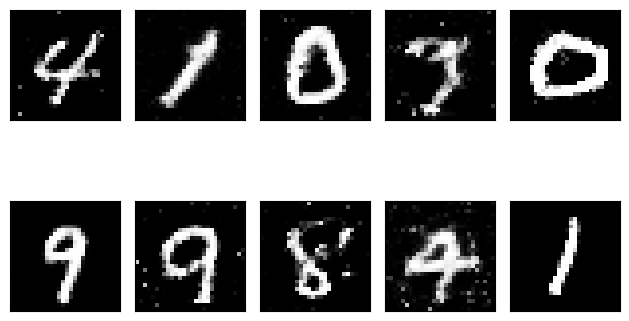

In [12]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )

        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(
            np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        )

        for k in range(samples):
            plt.subplot(2, 5, k + 1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap="gray")
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

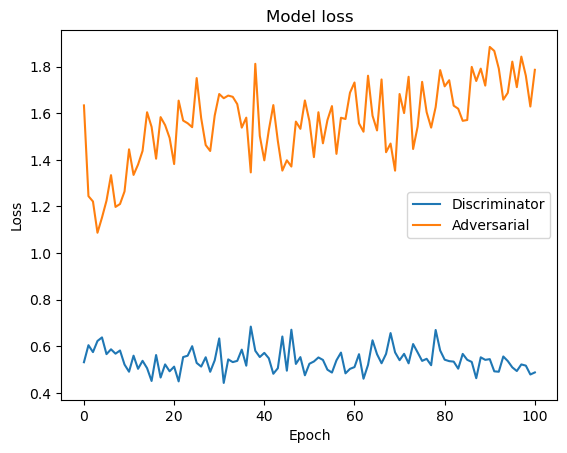

In [13]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()